Time series modelling cryptocurrency

In [154]:
#importing the packages needed
import sys
!{sys.executable} -m pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm
from datetime import date
import math
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame as df
import sys
!{sys.executable} -m pip install arch
from arch import arch_model
from matplotlib.pyplot import figure

In [160]:
days_for_insample_forecasting = int(input ('Please insert the number of days to consider to get for in sample forecasting: '))
days_training = int(input ('Please insert the number of days to consider to get for training: '))


Please insert the number of days to consider to get for in sample forecasting: 10
Please insert the number of days to consider to get for training: 300


In [161]:
#insert the date (in sample forecasting)

end = date.today()
start = end-dt.timedelta(days=days_for_insample_forecasting)
start,end

(datetime.date(2022, 4, 28), datetime.date(2022, 5, 8))

In [162]:
#insert the date (in sample training)
end_training= start - dt.timedelta(days =1)
start_training = end_training-dt.timedelta(days=days_training)
start_training,end_training

(datetime.date(2021, 7, 1), datetime.date(2022, 4, 27))

In [163]:
#get data for eth 
crypto1= ['ETH-USD']

#get data for that crypto
chosen_crypto1 =pdr.get_data_yahoo(crypto1,start_training,end_training)
chosen_crypto1

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2021-07-01,2113.605469,2113.605469,2274.397461,2081.081055,2274.397461,29061701793
2021-07-02,2150.040283,2150.040283,2155.596436,2021.824829,2109.892578,31796212554
2021-07-03,2226.114258,2226.114258,2237.567139,2117.590088,2150.834961,17433361641
2021-07-04,2321.724121,2321.724121,2384.286865,2190.837646,2226.550293,18787107473
2021-07-05,2198.582520,2198.582520,2321.922852,2163.041504,2321.922852,20103794829
...,...,...,...,...,...,...
2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9696829579
2022-04-25,3009.393555,3009.393555,3018.415527,2804.507080,2922.990234,22332690614


In [164]:
#get data for btc
crypto2= ['BTC-USD']

#get data for that crypto
chosen_crypto2 =pdr.get_data_yahoo(crypto2,start_training,end_training)
chosen_crypto2

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2021-07-01,33572.117188,33572.117188,35035.984375,32883.781250,35035.984375,37838957079
2021-07-02,33897.046875,33897.046875,33939.589844,32770.679688,33549.601562,38728974942
2021-07-03,34668.546875,34668.546875,34909.261719,33402.695312,33854.421875,24383958643
2021-07-04,35287.781250,35287.781250,35937.566406,34396.476562,34665.566406,24924307911
2021-07-05,33746.003906,33746.003906,35284.343750,33213.660156,35284.343750,26721554282
...,...,...,...,...,...,...
2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167
2022-04-25,40458.308594,40458.308594,40491.753906,38338.378906,39472.605469,35445730570


In [165]:
#only the closing prices
crypto1_close = chosen_crypto1.Close
crypto1_close.head()
crypto2_close = chosen_crypto2.Close
crypto2_close.head()

Symbols,BTC-USD
Date,
2021-07-01,33572.117188
2021-07-02,33897.046875
2021-07-03,34668.546875
2021-07-04,35287.781250
2021-07-05,33746.003906


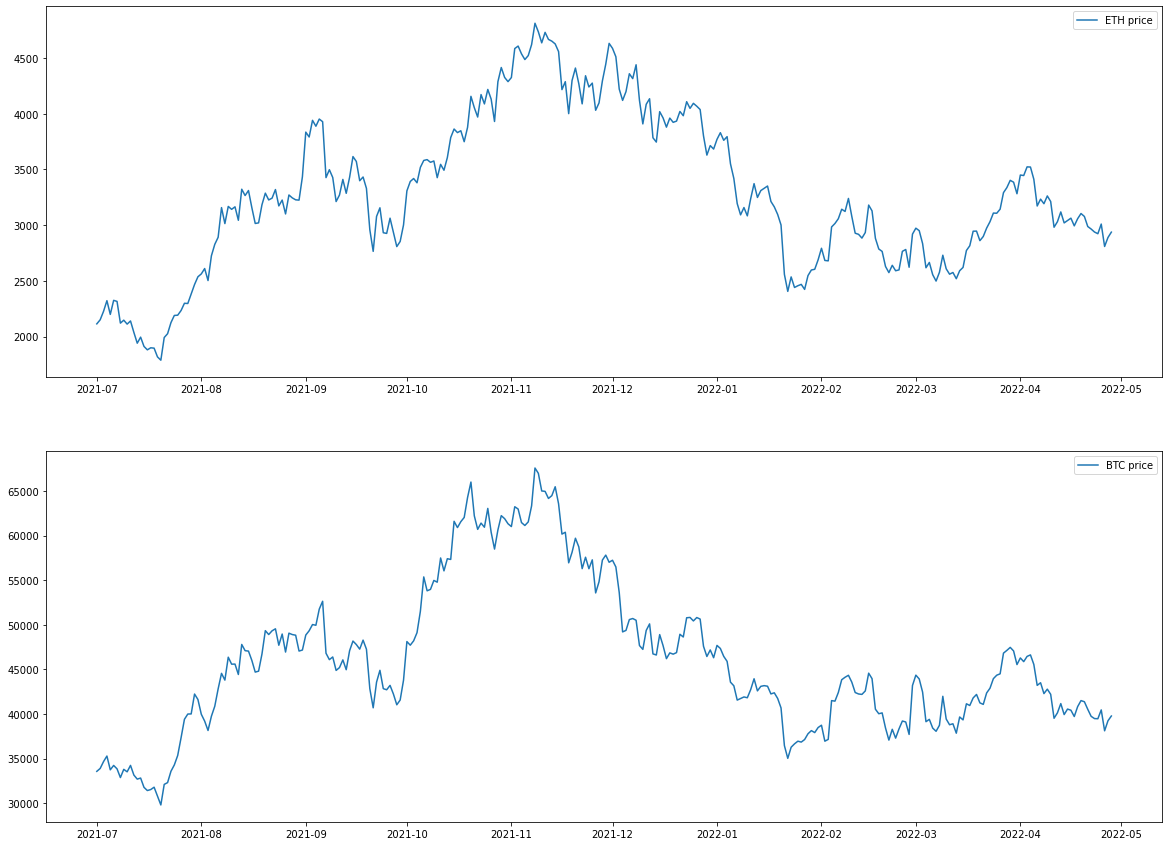

In [166]:
#plotting the prices
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20, 15))
plt.subplot(211)
plt.plot(crypto1_close, label ='ETH price')
plt.legend()
plt.subplot(212)
plt.plot(crypto2_close, label ='BTC price')
plt.legend()

In [167]:
#calculating returns for crypto1
returns1=crypto1_close/crypto1_close.shift(1)-1
returns1 = returns1.dropna()
returns1

Symbols,ETH-USD
Date,
2021-07-02,0.017238
2021-07-03,0.035383
2021-07-04,0.042949
2021-07-05,-0.053039
2021-07-06,0.057354
...,...
2022-04-24,-0.005235
2022-04-25,0.029651
2022-04-26,-0.066823


In [168]:
#calculating returns for crypto2
returns2=crypto2_close/crypto2_close.shift(1)-1
returns2 = returns2.dropna()
returns2

Symbols,BTC-USD
Date,
2021-07-02,0.009679
2021-07-03,0.022760
2021-07-04,0.017862
2021-07-05,-0.043692
2021-07-06,0.014496
...,...
2022-04-24,-0.000442
2022-04-25,0.025058
2022-04-26,-0.057858


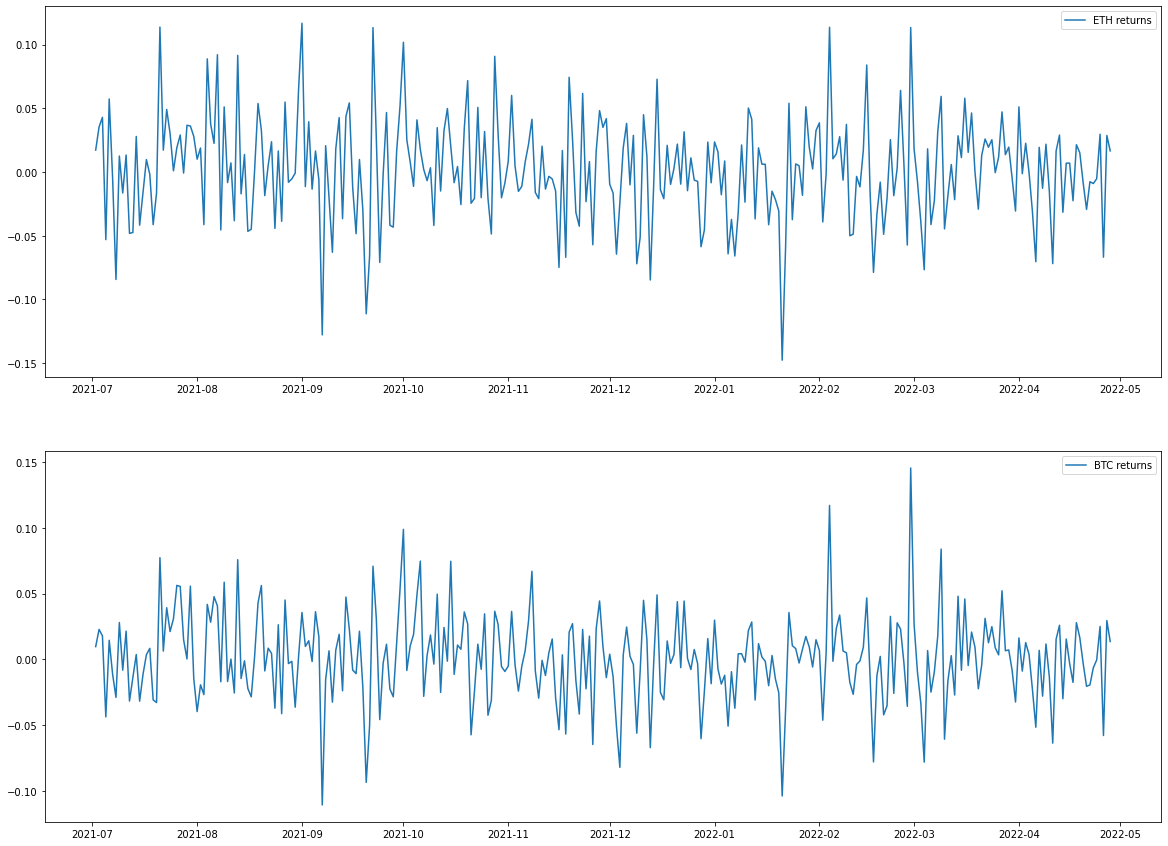

In [169]:
#plotting the prices
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20, 15))
plt.subplot(211)
plt.plot(returns1, label ='ETH returns')
plt.legend()
plt.subplot(212)
plt.plot(returns2, label ='BTC returns')
plt.legend()

In [170]:
#adf test for crypto1
stationarity1 = adfuller(returns1)
stationarity1
print('ADF Statistic: %f' % stationarity1[0])
print('p-value: %f' % stationarity1[1])

ADF Statistic: -9.570029
p-value: 0.000000


In [171]:
#adf test for crypto2
stationarity2 = adfuller(returns2)
stationarity2
print('ADF Statistic: %f' % stationarity2[0])
print('p-value: %f' % stationarity2[1])

ADF Statistic: -13.184405
p-value: 0.000000


In [172]:
#kpss test for crypto1
stationarity1_kpss= kpss(returns1)
stationarity1_kpss
print('ADF Statistic: %f' % stationarity1_kpss[0])
print('p-value: %f' % stationarity1_kpss[1])

ADF Statistic: 0.255939
p-value: 0.100000


C:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [173]:
#kpss test for crypto2
stationarity2_kpss= kpss(returns2)
stationarity2_kpss
print('ADF Statistic: %f' % stationarity2_kpss[0])
print('p-value: %f' % stationarity2_kpss[1])

ADF Statistic: 0.247118
p-value: 0.100000


C:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


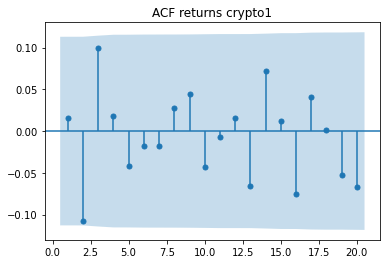

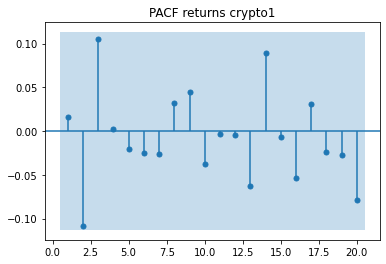

In [174]:

#acf returns2

acf1=plot_acf(returns1,lags=20,zero=False,title ='ACF returns crypto1')

#pacf returns2

pacf1=plot_pacf(returns1,lags=20,zero=False,title ='PACF returns crypto1')



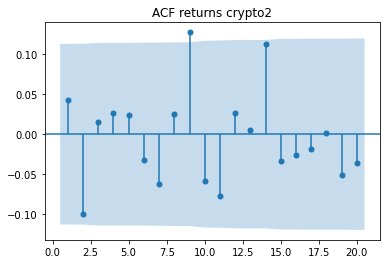

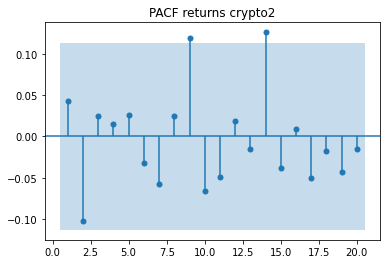

In [175]:
#acf returns2

acf2=plot_acf(returns2,lags=20,zero=False,title ='ACF returns crypto2')

#pacf returns2

pacf2=plot_pacf(returns2,lags=20,zero=False,title ='PACF returns crypto2')

In [176]:
#fitting ARIMA model

In [227]:
#crypto1
returns1_arima = returns1.asfreq('d')
arima1=ARIMA(returns1_arima,order=(10,2,8),freq='D')
model1_fit=arima1.fit()
print(model1_fit.summary())

C:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                ETH-USD   No. Observations:                  301
Model:                ARIMA(10, 2, 8)   Log Likelihood                 514.347
Date:                Sun, 08 May 2022   AIC                           -990.695
Time:                        13:52:33   BIC                           -920.386
Sample:                    07-02-2021   HQIC                          -962.554
                         - 04-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8181      0.334     -5.442      0.000      -2.473      -1.163
ar.L2         -2.4618      0.709     -3.474      0.001      -3.851      -1.073
ar.L3         -2.4065      0.943     -2.552      0.0

C:\Users\marti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


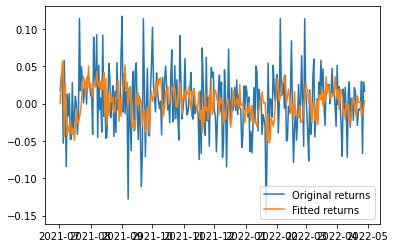

In [228]:
#fitted returns crypto1 and plot against original returns
arima1_fitted=model1_fit.fittedvalues
arima1_fitted
plt.plot(returns1,label='Original returns')
plt.plot(arima1_fitted,label='Fitted returns')
plt.legend()


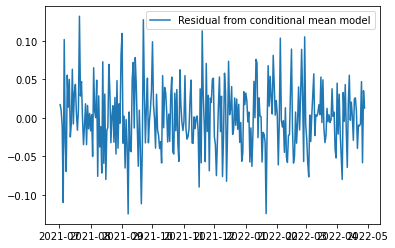

In [229]:
#residuals from arima1
residuals_arima1 = df(model1_fit.resid.dropna())
plt.plot(residuals_arima1,label ='Residual from conditional mean model')
plt.legend()


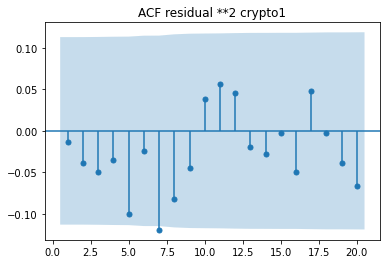

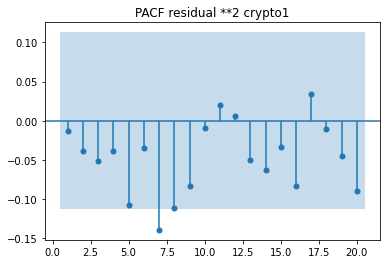

In [230]:
#acf and pacf on residual from arima1
acf1_residuals=plot_acf(residuals_arima1,lags=20,zero=False,title ='ACF residual **2 crypto1')

pacf1_residuals=plot_pacf(residuals_arima1,lags=20,zero=False,title ='PACF residual **2 crypto1')

In [231]:
#garch crypto1
garch1=arch_model(residuals_arima1,p=2,q=1,rescale = False)
garch1_fitted = garch1.fit()
print(garch1_fitted.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 24707791055138.46
Iteration:      2,   Func. Count:     18,   Neg. LLF: 57491.57425871899
Iteration:      3,   Func. Count:     29,   Neg. LLF: 100921.28785532022
Iteration:      4,   Func. Count:     40,   Neg. LLF: -517.58433977625
Optimization terminated successfully    (Exit mode 0)
            Current function value: -517.5843437010595
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                517.584
Distribution:                  Normal   AIC:                          -1025.17
Method:            Maximum Likelihood   BIC:                          -1006.63
                              

In [232]:

#getting all the data for crypto1
chosen_crypto1_all=pdr.get_data_yahoo(crypto1,start_training,end)
chosen_crypto1_all=chosen_crypto1_all.Close
chosen_crypto1_all=chosen_crypto1_all/chosen_crypto1_all.shift(1)-1
chosen_crypto1_all=chosen_crypto1_all.dropna()
chosen_crypto1_all


Symbols,ETH-USD
Date,
2021-07-02,0.017238
2021-07-03,0.035383
2021-07-04,0.042949
2021-07-05,-0.053039
2021-07-06,0.057354
...,...
2022-05-04,0.056465
2022-05-05,-0.065099
2022-05-06,-0.019727


Text(0.5, 1.0, 'Train/Test split for crypto1')

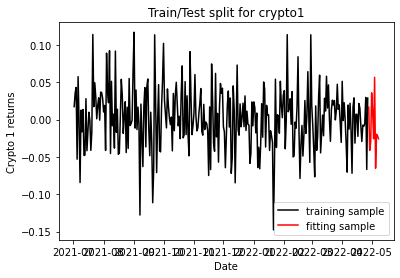

In [233]:
#plotting all sample1
train1_sample = chosen_crypto1_all[chosen_crypto1_all.index <= pd.to_datetime(end_training)]
fit1_sample = chosen_crypto1_all[chosen_crypto1_all.index > pd.to_datetime(end_training)]
plt.plot(train1_sample, color = "black",label ='training sample')
plt.plot(fit1_sample, color = "red",label = 'fitting sample')
plt.legend()
plt.ylabel('Crypto 1 returns')
plt.xlabel('Date')
plt.title("Train/Test split for crypto1")




In [234]:
#plotting forecasts for crypto1
returns1_pred = model1_fit.get_forecast(len(fit1_sample.index))
returns1_pred_int= returns1_pred.conf_int(alpha = 0.05)
returns1_pred_int["Predictions"] = model1_fit.predict(start = returns1_pred_int.index[0], end = returns1_pred_int.index[-1])
returns1_pred_int.index = fit1_sample.index
predictions1= returns1_pred_int["Predictions"]
figure(figsize=(15, 10), dpi=1000)
plt.plot(predictions1, color='green', label = 'Predictions')
plt.plot(train1_sample, color = "black",label ='training sample')
plt.plot(fit1_sample, color = "red",label = 'fitting sample')
plt.legend()


C:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
